Importando as bibliotecas


In [1]:
import os

import numpy as np
from IPython.display import display
from skimage import util, transform, filters, color, measure, morphology
from sklearn import model_selection, neighbors, metrics, preprocessing

#alterar para notebook
# %matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Conjunto de dados

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# classes - Conjunto completo
IMG_DIR = os.path.join('mpeg7_4classes_aug_x8_work')
IMGS_TRAIN = os.path.join(IMG_DIR,'Train')
IMGS_TEST = os.path.join(IMG_DIR,'Test')

# Lista das pastas na pasta 'ds_path' (classes)
classes_list = os.listdir(IMGS_TRAIN)
#print(classes_list)

# Lista com as imagens no dataset
image_list_train = []
image_list_test = []

# Lista com os rótulos das imagens
label_list_train = []
label_list_test = []

# Lista com os nomes das imagens
filename_list_train_ = []
filename_list_test_ = []

# Percorre as classes do dataset
for classe in classes_list:
    
    # Listagem de todas as imagens na pasta daquela classe
    filename_list_train = os.listdir(os.path.join(IMGS_TRAIN, classe))

    filename_list_test = os.listdir(os.path.join(IMGS_TEST, classe))
    
    # Percorre os arquivos na pasta atual
    for filename in sorted(filename_list_train):
        # Carrega a imagem
        img_train = plt.imread(os.path.join(IMGS_TRAIN, classe, filename))
        
        # Redimensiona a imagem para 1/4 do tamanho original
        #img_temp = transform.resize(img_temp, (img_temp.shape[0]//4, img_temp.shape[1]//4), anti_aliasing=True)
        
        # Adiciona a imagem a lista de imagens
        image_list_train.append(img_train)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list_train.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_train_.append(filename)

    # Percorre os arquivos na pasta atual
    for filename in sorted(filename_list_test):
        # Carrega a imagem
        img_test = plt.imread(os.path.join(IMGS_TEST, classe, filename))
        
        # Redimensiona a imagem para 1/4 do tamanho original
        #img_temp = transform.resize(img_temp, (img_temp.shape[0]//4, img_temp.shape[1]//4), anti_aliasing=True)
        
        # Adiciona a imagem a lista de imagens
        image_list_test.append(img_test)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list_test.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_test_.append(filename)

In [4]:
# Lista com os rótulos das imagens
print(label_list_train)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 

In [5]:
# Lista com os rótulos das imagens
print(label_list_test)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beet

Convertendo os nomes das classes para índices numéricos

In [6]:
# Indices das classes dos objetos do dataset
_, _, label_list_train_idx = np.unique(label_list_train, return_index=True, return_inverse=True)
_, _, label_list_test_idx = np.unique(label_list_test, return_index=True, return_inverse=True)

label_list_train_idx.sort()
label_list_test_idx.sort()

label_train_list_idx = np.array(label_list_train_idx)
label_test_list_idx = np.array(label_list_test_idx)

print(type(label_list_train_idx))
print(label_list_train_idx)

print(type(label_list_test_idx))
print(label_list_test_idx)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 

Plotando as imagens do conjunto de dados

In [7]:
# Seleciona apenas as primeiras N imagens de cada classe
image_list_temp = []
filename_list_temp = []

for i in range(4):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    image_list_temp += [image_list_train[j] for j in np.where(label_list_train_idx==i)[0][:6]]
    filename_list_temp += [filename_list_train_[j] for j in np.where(label_list_train_idx==i)[0][:6]]

#print(image_list_temp)
#print(filename_list_temp)

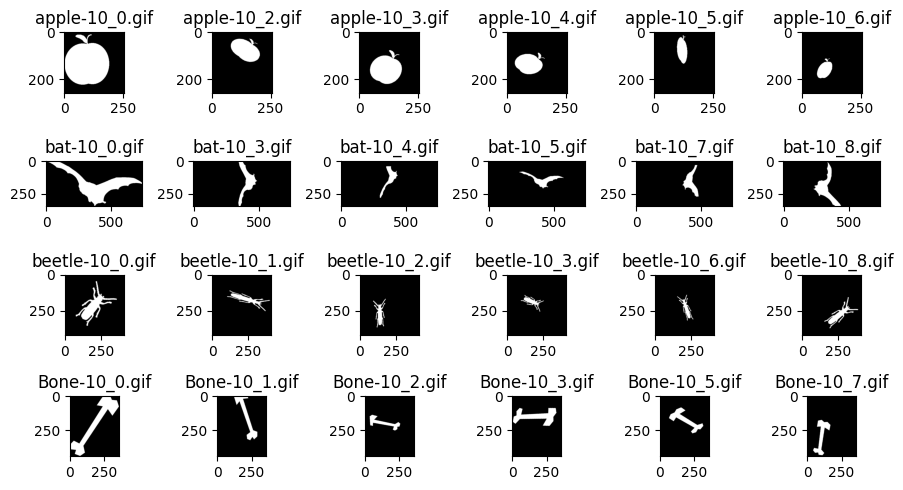

In [8]:
fig, ax = plt.subplots(4, 6, figsize=(9, 5))

for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap=plt.cm.gray)
    ax[i//6, i%6].set_title(str(filename))
    #ax[i//6, i%6].axis('off')

fig.tight_layout()
plt.show()

Extraindo caracteristicas

In [9]:
# Nomes das caracteristicas computadas
features = ['solidity', 'eccentricity','extent']

In [10]:
image_list = [*image_list_train, *image_list_test]
label_list = [*label_list_train, *label_list_test]
filename_list = [*filename_list_train_, *filename_list_test_]
label_list_idx = [*label_list_train_idx, *label_list_test_idx]

# Arranjo 2D com as caracteristicas das imagens
feature_mat = []

# Lista com as imagens segmentadas (binárias)
seg_list = []

# Lista com os rótulos das imagens
list_label = []

for i, (image, label) in enumerate(zip(image_list, label_list)):
    # DEBUG
    print('Imagem {} - classe {}'.format(i, label))
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label.append(label)
    
    # Segmenta a imagem
    # --------------------------------------------------
    # Converte a imagem para float
    img_float = util.img_as_float(image)
    # DEBUG
    #print(img_float.shape, img_float.min(), img_float.max())
    
    # Converte imagem para níveis de cinza
    if img_float.shape[-1] == 4:
        img_float = color.rgb2gray(color.rgba2rgb(img_float))
    
    # Segmentação por limiarização usando Otsu
    img_seg = img_float > filters.threshold_otsu(img_float)
    # DEBUG
    #print(img_seg.shape, img_seg.min(), img_seg.max())
    
    # Remove objetos na imagem com menos de N pixels.
    img_seg = morphology.remove_small_objects(img_seg, 100)
    
    # Adiciona a imagem segmentada à lista.
    seg_list.append(img_seg)
    
    # Calcula a imagem de rótulos
    im_lbl = measure.label(img_seg)
    #plt.imshow(im_lbl)
    #plt.show()
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    props = measure.regionprops(im_lbl)
    
    ###print(len(props))
    if len(props) != 1:
        print(f'ERRO de segmentação: {len(props)}')
        continue

    # Itera pelas propriedades computadas
    for prop in props:
        #area = prop.area
        #major_axis = prop.major_axis_length
        #minor_axis = prop.minor_axis_length
        solidity = prop.solidity
        eccentricity = prop.eccentricity
        #equivalent_diameter = prop.equivalent_diameter
        #perimeter = prop.perimeter
        extent = prop.extent
        #feret_diameter_max = prop.feret_diameter_max

        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [solidity, eccentricity, extent]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat.append(feature_list)

Imagem 0 - classe apple
Imagem 1 - classe apple
Imagem 2 - classe apple
Imagem 3 - classe apple
Imagem 4 - classe apple
Imagem 5 - classe apple
Imagem 6 - classe apple
Imagem 7 - classe apple
Imagem 8 - classe apple
Imagem 9 - classe apple
Imagem 10 - classe apple
Imagem 11 - classe apple
Imagem 12 - classe apple
Imagem 13 - classe apple
Imagem 14 - classe apple
Imagem 15 - classe apple
Imagem 16 - classe apple
Imagem 17 - classe apple
Imagem 18 - classe apple
Imagem 19 - classe apple
Imagem 20 - classe apple
Imagem 21 - classe apple
Imagem 22 - classe apple
Imagem 23 - classe apple
Imagem 24 - classe apple
Imagem 25 - classe apple
Imagem 26 - classe apple
Imagem 27 - classe apple
Imagem 28 - classe apple
Imagem 29 - classe apple
Imagem 30 - classe apple
Imagem 31 - classe apple
Imagem 32 - classe apple
Imagem 33 - classe apple
Imagem 34 - classe apple
Imagem 35 - classe apple
Imagem 36 - classe apple
Imagem 37 - classe apple
Imagem 38 - classe apple
Imagem 39 - classe apple
Imagem 40 

Imagem 330 - classe beetle
Imagem 331 - classe beetle
Imagem 332 - classe beetle
Imagem 333 - classe beetle
Imagem 334 - classe beetle
Imagem 335 - classe beetle
Imagem 336 - classe beetle
Imagem 337 - classe beetle
Imagem 338 - classe beetle
Imagem 339 - classe beetle
Imagem 340 - classe beetle
Imagem 341 - classe beetle
Imagem 342 - classe beetle
Imagem 343 - classe beetle
Imagem 344 - classe beetle
Imagem 345 - classe beetle
Imagem 346 - classe beetle
Imagem 347 - classe beetle
Imagem 348 - classe beetle
Imagem 349 - classe beetle
Imagem 350 - classe beetle
Imagem 351 - classe beetle
Imagem 352 - classe beetle
Imagem 353 - classe beetle
Imagem 354 - classe beetle
Imagem 355 - classe beetle
Imagem 356 - classe beetle
Imagem 357 - classe beetle
Imagem 358 - classe beetle
Imagem 359 - classe beetle
Imagem 360 - classe beetle
Imagem 361 - classe beetle
Imagem 362 - classe beetle
Imagem 363 - classe beetle
Imagem 364 - classe beetle
Imagem 365 - classe beetle
Imagem 366 - classe beetle
I

Imagem 651 - classe beetle
Imagem 652 - classe beetle
Imagem 653 - classe beetle
Imagem 654 - classe beetle
Imagem 655 - classe beetle
Imagem 656 - classe beetle
Imagem 657 - classe beetle
Imagem 658 - classe beetle
Imagem 659 - classe beetle
Imagem 660 - classe beetle
Imagem 661 - classe beetle
Imagem 662 - classe beetle
Imagem 663 - classe beetle
Imagem 664 - classe beetle
Imagem 665 - classe beetle
Imagem 666 - classe bone
Imagem 667 - classe bone
Imagem 668 - classe bone
Imagem 669 - classe bone
Imagem 670 - classe bone
Imagem 671 - classe bone
Imagem 672 - classe bone
Imagem 673 - classe bone
Imagem 674 - classe bone
Imagem 675 - classe bone
Imagem 676 - classe bone
Imagem 677 - classe bone
Imagem 678 - classe bone
Imagem 679 - classe bone
Imagem 680 - classe bone
Imagem 681 - classe bone
Imagem 682 - classe bone
Imagem 683 - classe bone
Imagem 684 - classe bone
Imagem 685 - classe bone
Imagem 686 - classe bone
Imagem 687 - classe bone
Imagem 688 - classe bone
Imagem 689 - classe 

In [11]:
# Converte a lista de caracteristicas para um arranjo NumPy
feature_map = np.array(feature_mat)

# Imprime a matriz de caracteristica
with np.printoptions(precision=4, suppress=True):
    print(feature_map)

[[0.9042 0.2478 0.7068]
 [0.9162 0.777  0.7045]
 [0.8991 0.3734 0.6674]
 ...
 [0.4535 0.9788 0.1881]
 [0.4507 0.9855 0.178 ]
 [0.4507 0.9855 0.178 ]]


In [12]:
# Algumas estatisticas sobre o conjunto de caracteristicas
with np.printoptions(precision=4, suppress=True):
    print(feature_map.min(0))
    print(feature_map.max(0))
    print(feature_map.mean(0))
    print(feature_map.std(0))

[0.3297 0.1595 0.089 ]
[0.9696 0.9985 0.7971]
[0.6227 0.8001 0.386 ]
[0.197  0.21   0.1894]


In [13]:
# Seleciona apenas as primeiras N imagens de cada classe
seg_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(4):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    seg_list_temp += [seg_list[j] for j in np.where(label_list_train_idx==i)[0][:6]]
    filename_list_temp += [filename_list_train_[j] for j in np.where(label_list_train_idx==i)[0][:6]]

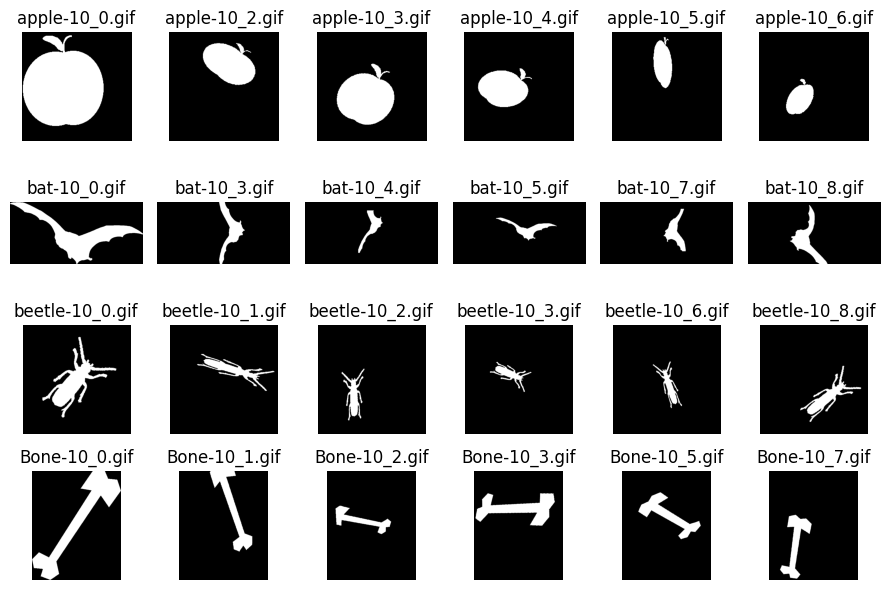

In [14]:
fig, ax  = plt.subplots(4, 6, figsize=(9, 6))

for i, (image, filename) in enumerate(zip(seg_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap='gray')
    ax[i//6, i%6].set_title(str(filename))
    ax[i//6, i%6].axis('off')
    
fig.tight_layout()
plt.show()

In [15]:
df = pd.DataFrame(feature_map, columns=features)

df['class'] = label_list

### print(df)
display(df)

,solidity,eccentricity,extent,class
0,0.904154,0.247787,0.706766,apple
1,0.916241,0.776975,0.704500,apple
2,0.899108,0.373363,0.667385,apple
3,0.898984,0.675792,0.686684,apple
4,0.918016,0.925710,0.703591,apple
...,...,...,...,...
715,0.478761,0.981412,0.191727,bone
716,0.453541,0.978811,0.188115,bone
717,0.453541,0.978811,0.188115,bone
718,0.450704,0.985526,0.177989,bone


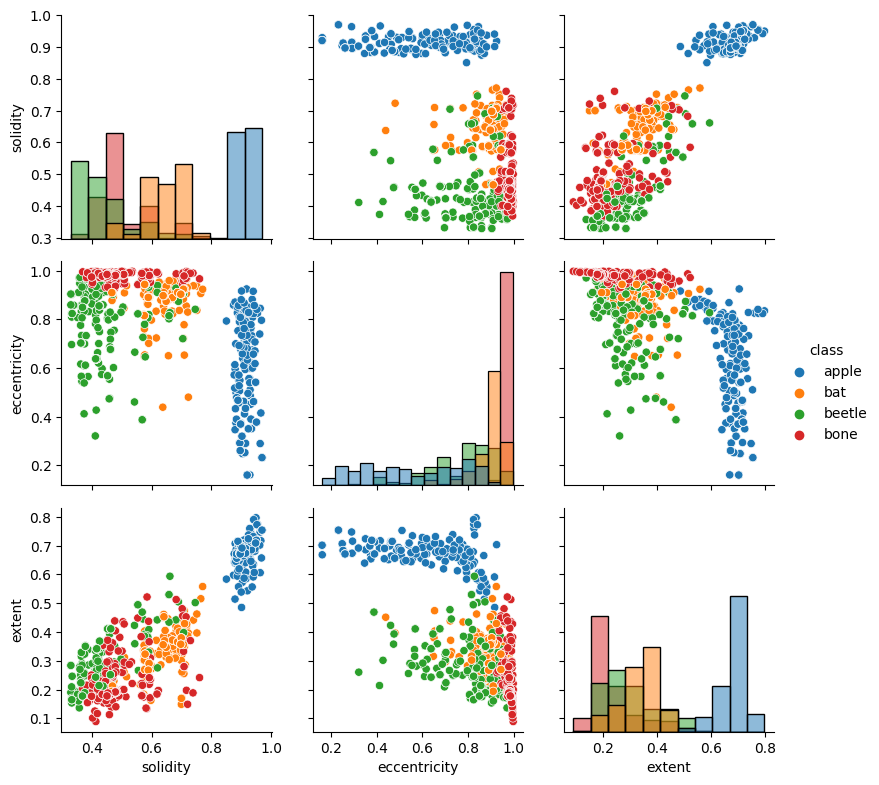

In [16]:
g = sns.PairGrid(df, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Separando os conjuntos de dados

In [17]:
# Escolhendo as caracteristicas
feature_map_ok = feature_map[:,:]

# Treino
X_train_1 = feature_map_ok[0:len(image_list_train),:]
y_train_1 = label_list_train_idx

# Teste
X_test = feature_map_ok[len(image_list_train):,:]
y_test = label_list_test_idx

# 30% do conjunto de Treino para validação.
X_train_2, X_val, y_train_2, y_val = model_selection.train_test_split(X_train_1, 
                                                                      y_train_1, 
                                                                      test_size=0.3, 
                                                                      random_state=393,
                                                                      stratify=y_train_1)

Normalizando

In [18]:
# Transformada Normal de Caracteristicas (Manual)
# ----
# X_train_2_norm = (X_train_2 - X_train_2_mean) / X_train_2_std
# X_val_norm = (X_val - X_train_2_mean) / X_train_2_std
# X_test_norm = (X_test - X_train_2_mean) / X_train_2_std

# Transformada Normal de Caracteristicas (Sklearn)
# ----
scaler = preprocessing.StandardScaler().fit(X_train_2)
with np.printoptions(precision=4, suppress=True):
    print(f'Média:  \t {np.array(scaler.mean_)}')
    print(f'Desv. pad.: \t {np.array(scaler.scale_)}')

Média:  	 [0.6263 0.8263 0.3864]
Desv. pad.: 	 [0.1975 0.1784 0.186 ]


In [19]:
X_train_norm = scaler.transform(X_train_2)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

with np.printoptions(precision=4, suppress=True):
    print(f'Treino: \t {X_train_norm.mean():.4f} ± {X_train_norm.std():.4f}')
    print(f'Validação: \t {X_val_norm.mean():.4f} ± {X_val_norm.std():.4f}')
    print(f'Teste:   \t {X_test_norm.mean():.4f} ± {X_test_norm.std():.4f}')

Treino: 	 0.0000 ± 1.0000
Validação: 	 -0.0085 ± 0.9791
Teste:   	 -0.1803 ± 1.2181


Otimizando hiperparametros com o conjunto de validação

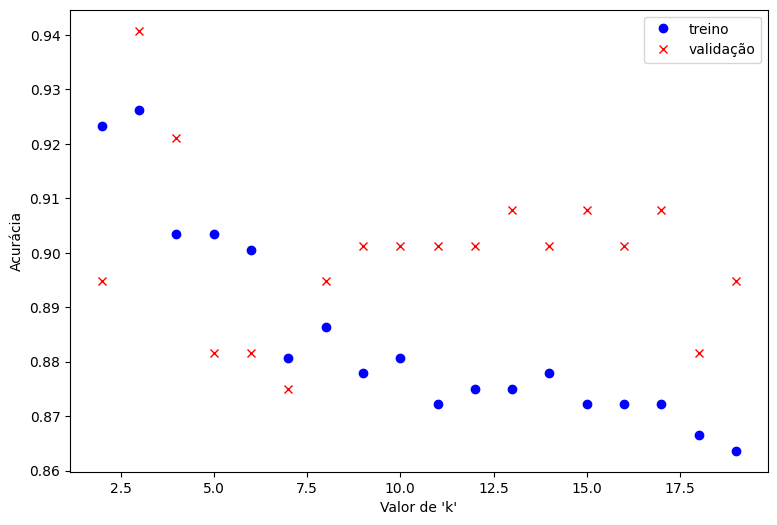

In [20]:
k_list = list(range(2,20))

# Lista com as acurácias de traino
acc_train_list = []
# Lista com as acurácias de validação
acc_val_list = []

for k_ in k_list:
    # Constrói um classificador K-NN. K = k_
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_)

    # Treinando o classificador
    clf.fit(X_train_norm, y_train_2)

    # Testando o classificador (usando o conjunto de validação)
    pred = clf.predict(X_val_norm)
    acc_val = metrics.accuracy_score(y_val, pred)
    
    acc_val_list.append(acc_val)
    
    # Testando o classificador (usando o conjunto de treino)
    # **** Apenas para comparar com o resultado da validação ****
    pred_train = clf.predict(X_train_norm)
    acc_train = metrics.accuracy_score(y_train_2, pred_train)
    
    acc_train_list.append(acc_train)  
    
plt.figure(figsize=(9, 6))

plt.plot(k_list, acc_train_list, 'o', color='blue', label='treino')
plt.plot(k_list, acc_val_list, 'x', color='red', label='validação')
plt.xlabel("Valor de 'k'")
plt.ylabel("Acurácia")
plt.legend(loc='best')

plt.show()

In [21]:
print('k \t acc. treino \t acc. val')
print('----------------------------')
for k_, acc_t, acc_v in zip(k_list, acc_train_list, acc_val_list):
    print(f'{k_} \t {acc_t:.4f} \t {acc_v:.4f}')

k_best = k_list[np.argmax(acc_val_list)]
print(f'\nMelhor \'k\': {k_best} ({np.max(acc_val_list):.4f} acc.)')

k 	 acc. treino 	 acc. val
----------------------------
2 	 0.9233 	 0.8947
3 	 0.9261 	 0.9408
4 	 0.9034 	 0.9211
5 	 0.9034 	 0.8816
6 	 0.9006 	 0.8816
7 	 0.8807 	 0.8750
8 	 0.8864 	 0.8947
9 	 0.8778 	 0.9013
10 	 0.8807 	 0.9013
11 	 0.8722 	 0.9013
12 	 0.8750 	 0.9013
13 	 0.8750 	 0.9079
14 	 0.8778 	 0.9013
15 	 0.8722 	 0.9079
16 	 0.8722 	 0.9013
17 	 0.8722 	 0.9079
18 	 0.8665 	 0.8816
19 	 0.8636 	 0.8947

Melhor 'k': 3 (0.9408 acc.)


In [22]:
# Constrói um classificador K-NN. K = k_best
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)

# Treinando o classificador
clf.fit(X_train_norm, y_train_2)

# Testando o classificador (usando o conjunto de TESTES)
pred = clf.predict(X_test_norm)
acc_val = metrics.accuracy_score(y_test, pred)

print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, pred))


Matriz de confusão:
[[54  0  0  0]
 [ 0 54  0  0]
 [ 0  0 54  0]
 [ 0  2  0 52]]

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      1.00      0.98        54
           2       1.00      1.00      1.00        54
           3       1.00      0.96      0.98        54

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216

